In [22]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import seaborn as sns
import os
import tweepy


from functools import reduce

from datetime import datetime
import time




# Gather

In [23]:
#read the csv file

twitter_df = pd.read_csv('twitter-archive-enhanced.csv')


In [24]:
# Getting a webpage stored in url
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

# Opening and saving the file selected after the last slash from the url => image-predictions.tsv
with open(url.split('/')[-1], mode = 'wb') as file:
        file.write(response.content)


In [25]:
# read the csv file
image_df = pd.read_csv("image-predictions.tsv", sep = '\t')


In [29]:

#read _json file
with open('tweet-json.txt', 'r') as f:
    tweet_df = pd.read_json(f, lines=True)
tweet_df = tweet_df[['id','favorite_count','retweet_count']]


## Access

### twitter_df

In [31]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [32]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [33]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [34]:
# Look at tweet_id dtype
type(twitter_df["tweet_id"][0])

numpy.int64

In [35]:
#look for duplicates
sum(twitter_df['tweet_id'].duplicated())

0

In [36]:
# Look to make sure only one ID of each
twitter_df.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [37]:
#look fore missing values
twitter_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [38]:
# Look at how many numerators there are
twitter_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [39]:
# Look at how many denomiators there are
twitter_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [40]:
# Look to see if multiple names 
twitter_df['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Tucker         10
Penny          10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
Buddy           7
an              7
Bailey          7
Daisy           7
Oscar           6
Dave            6
Rusty           6
Milo            6
Bella           6
Scout           6
Koda            6
Stanley         6
Jax             6
Leo             6
Jack            6
Sammy           5
             ... 
Miguel          1
Lance           1
Antony          1
Traviss         1
Ziva            1
Chubbs          1
Gustaf          1
Anna            1
Ashleigh        1
Fabio           1
Jimbo           1
Hamrick         1
Rilo            1
Napolean        1
Tedrick         1
Callie          1
Jay             1
Christoper      1
Fillup          1
Ronduh          1
Murphy          1
Laela           1
Link            1
Ralphie         1
Zooey     

### image_df

In [41]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [42]:
image_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [44]:
# Make sure only one ID for each
image_df.tweet_id.value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
776477788987613185    1
772114945936949249    1
699775878809702401    1
780858289093574656    1
700462010979500032    1
732726085725589504    1
738883359779196928    1
798644042770751489    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
668620235289837568    1
842765311967449089    1
685315239903100929    1
673686845050527744    1
680473011644985345    1
666051853826850816    1
675853064436391936    1
693231807727280129    1
705475953783398401    1
829449946868879360    1
759923798737051648    1
667160273090932737    1
680934982542561280    1
743545585370791937    1
                     ..
794926597468000259    1
776113305656188928    1
825026590719483904    1
834209720923721728    1
775733305207554048    1
669564461267722241    1
879492040517615616    1
720775346191278080    1
666362758909284353    1
750506206503038976    1
6931556864910008

In [45]:
# Look to see if multiple of the same image
image_df['jpg_url'].value_counts()

https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/media/CvJCabcWgAIoUxW.jpg                                            2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg                                            2
https://pbs.twimg.com/media/CdHwZd0VIAA4792.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/media/Cwx99rpW8AMk_Ie.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg                       

In [46]:
# How many of each dog is represented in p1
image_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
Eskimo_dog                    18
Maltese_dog                   18
beagle                        18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [47]:
# Look to see how many of each dog is represented in p2
image_df['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
chow                               20
Samoyed                            20
miniature_pinscher                 20
malinois                           20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [48]:
# Look to see how many of each dog type in p3
image_df['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
toy_poodle                        29
Pekinese                          29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
L

In [49]:
# Check the total of duplicated images
sum(image_df.jpg_url.duplicated())

66

### tweet_df

In [50]:
tweet_df

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
5,891087950875897856,20562,3261
6,890971913173991426,12041,2158
7,890729181411237888,56848,16716
8,890609185150312448,28226,4429
9,890240255349198849,32467,7711


In [51]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [52]:
# Check the Id is only one per number
tweet_df.id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
720775346191278080    1
879492040517615616    1
785927819176054784    1
834209720923721728    1
857062103051644929    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
678800283649069056    1
6815798356684554

In [53]:
# Look at favorite values counts
tweet_df.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [54]:
# Look at id dtype
type(tweet_df["id"][0])

numpy.int64

In [55]:
# Look at retweet_count numbers
tweet_df.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [56]:
# Check for any ID duplicates
sum(tweet_df['id'].duplicated())

0

## Quality
'Completeness, Validity, Accuracy, Consistency'

##### twitter dataset

- 59 null values in the expanded_url column
- timestamp should be in a datetime format.
- In several columns null objects are non-null (None to NaN).
- Name column have invalid names i.e 'None', 'a', 'an'.
- We only want original ratings (no retweets) that have images.
- Some columns are in relpy to a tweet and can be dropped since they are not needed. (in_reply_to_status_id, in_reply_to_user_id)
- Text column is not displaying full text 

##### image  dataset

- Missing values from images dataset (2075 rows instead of 2356)
- jpg_url has 66 duplications
- p1,p2,p3 have inconsistant capitalization and names as None


##### tweet dataset

- tweet id is labeled as 'id'



## Tidiness
'Untidy data'

- Four columns: doggo, floofer, pupper, puppo when we only need one for general dog_stage
- p1,p2,p3 can be combined into one prediction column
- p1_conf,p2_conf,p3_conf can be combined into one confidence column
- Join 'image_clean' and 'tweet_clean' to 'twitter_clean'

## Clean

##### Make copies of origional dataframes

In [57]:
twitter_clean = twitter_df.copy()
image_clean = image_df.copy()
tweet_clean = tweet_df.copy()

##### Define
1. Get rid of all the null values in the expanded_url column.

##### Code

In [58]:
# Drop null values 
twitter_clean = twitter_clean[pd.notnull(twitter_clean['expanded_urls'])]

##### Test

In [59]:
# Check they were dropped
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

#### Define
2.  Rename the "id" column in the tweet_clean to "tweet_id"

In [60]:
# Rename 'id' to 'tweet_id' in tweet_clean
tweet_clean.rename(columns = {'id':'tweet_id'}, inplace = True) 

##### Test

In [61]:
# Check the info was changed
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


##### Define
3.  Some of the tweets in the image_clean dataframe have duplicated jpg_url and need to be deleted. 

##### Code

In [62]:
# Drop duplicates of the jpg_url
image_clean = image_clean.drop_duplicates(subset = ["jpg_url"], keep = "last")

##### Test

In [63]:
# Check the drop
sum(image_clean.jpg_url.duplicated())

0

##### Define
4.  Missing data. Some columns refer to the retweet (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) that is not needed and can be dropped.

##### Code

In [64]:
# Drop columns that are not needed 
twitter_clean = twitter_clean.drop("retweeted_status_id", axis = 1)
twitter_clean = twitter_clean.drop("retweeted_status_user_id", axis = 1)
twitter_clean = twitter_clean.drop("retweeted_status_timestamp", axis = 1)

##### Test

In [65]:
# Check the drop 
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2297 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2297 non-null object
source                   2297 non-null object
text                     2297 non-null object
expanded_urls            2297 non-null object
rating_numerator         2297 non-null int64
rating_denominator       2297 non-null int64
name                     2297 non-null object
doggo                    2297 non-null object
floofer                  2297 non-null object
pupper                   2297 non-null object
puppo                    2297 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 269.2+ KB


##### Define
5.  Seperate timestamp into Datetime and seperate columns into month, day, and year.

##### Code

In [66]:
# convert time stamp into datetime
twitter_clean['timestamp'] = pd.to_datetime(twitter_clean['timestamp'])

#extract year, month and day to new columns
twitter_clean['year'] = twitter_clean['timestamp'].dt.year
twitter_clean['month'] = twitter_clean['timestamp'].dt.month
twitter_clean['day'] = twitter_clean['timestamp'].dt.day

# drop timestamp column
twitter_clean = twitter_clean.drop('timestamp', 1)

##### Test

In [67]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017,7,29


#### Define
6.  Missing data. Some columns are in relpy to a tweet and can be dropped since they are not needed. (in_reply_to_status_id,	in_reply_to_user_id)	

##### Code

In [68]:
# Drop columns that are not needed
twitter_clean = twitter_clean.drop("in_reply_to_status_id", axis = 1)
twitter_clean = twitter_clean.drop("in_reply_to_user_id", axis = 1)

##### Test


In [69]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2297 non-null int64
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  2297 non-null object
doggo                 2297 non-null object
floofer               2297 non-null object
pupper                2297 non-null object
puppo                 2297 non-null object
year                  2297 non-null int64
month                 2297 non-null int64
day                   2297 non-null int64
dtypes: int64(6), object(8)
memory usage: 269.2+ KB


##### Define
7.   Fix name inconsistancies and None and replace with NAN values

##### Code

In [70]:
# Find names with lowercase letter
lowercase_names = []
for row in twitter_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [71]:
# Replace the names that start with a lowercase letter to a NaN
twitter_clean['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's to a NaN
twitter_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

##### Test

In [72]:
# Check value counts to see that names starting with a lowercase letter are gone as well as names 'None'
twitter_clean['name'].value_counts()

Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
Toby           7
Daisy          7
Buddy          7
Bailey         7
Koda           6
Jack           6
Dave           6
Oscar          6
Scout          6
Jax            6
Stanley        6
Bella          6
Rusty          6
Leo            6
Milo           6
George         5
Chester        5
Larry          5
Louis          5
Bentley        5
              ..
Lance          1
Antony         1
Traviss        1
Ziva           1
Koko           1
Rambo          1
Chubbs         1
Rilo           1
Zeek           1
Napolean       1
Tedrick        1
Callie         1
Jay            1
Christoper     1
Ashleigh       1
Fillup         1
Murphy         1
Laela          1
Link           1
Fynn           1
Ralphie        1
Zooey          1
Vince          1
Heinrich       1
Chloe          1
Blipson        1
Ronduh         1
Anna          

##### Define
8.  Display the full contents of the 'text' column in the twitter_clean dataframe

##### Code

In [73]:
pd.set_option('display.max_colwidth', -1)

##### Test

In [74]:
twitter_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,2017,7,29


##### Define
9.  In the twitter_clean dataframe there are 4 different columns (doggo, floofer, pupper, and puppo) and they can be combined into one "dog_stages" column. Replacing the None value for blank, concatenating all 4 columns to 1 column dog_stages, updating multiple dog_stages and dropping doggo, floofer, pupper, puppo columns.

##### Code

In [75]:
# Replace the None value for blank ''
twitter_clean.doggo.replace("None", '', inplace = True)
twitter_clean.floofer.replace("None", '', inplace = True)
twitter_clean.pupper.replace("None", '', inplace = True)
twitter_clean.puppo.replace("None", '', inplace = True)

In [76]:
# Concat all 4 columns to 1 column dog_stage
twitter_clean['dog_stage'] = twitter_clean['doggo'] + twitter_clean['floofer'] + twitter_clean['pupper'] + twitter_clean['puppo']

In [77]:
# Drop the doggo, floofer, pupper, puppo columns
twitter_clean = twitter_clean.drop("doggo", 1)
twitter_clean = twitter_clean.drop("floofer", 1)
twitter_clean = twitter_clean.drop("pupper", 1)
twitter_clean = twitter_clean.drop("puppo", 1)

##### Test

In [78]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2297 non-null int64
source                2297 non-null object
text                  2297 non-null object
expanded_urls         2297 non-null object
rating_numerator      2297 non-null int64
rating_denominator    2297 non-null int64
name                  1502 non-null object
year                  2297 non-null int64
month                 2297 non-null int64
day                   2297 non-null int64
dog_stage             2297 non-null object
dtypes: int64(6), object(5)
memory usage: 215.3+ KB


##### Define
10. Combine the multiple predictions(p1,p2,p3) and condifence(p1_conf,p2_conf,p3_conf) columns into a seperate prediction and confidenced column in the image database 

##### Code

In [79]:
# Store the prediction p1 or p2 or p3 the one with the higher confidence level that managed to identify a dog (p1_dog = True)
# Store the confidence level p1_conf or p2_conf or p3_conf.
prediction = []
confidence = []

def prediction_summarize(df):
    if df["p1_dog"] == True:
        prediction.append(df["p1"])
        confidence.append(df["p1_conf"])
    
    elif df["p2_dog"] == True:
        prediction.append(df["p2"])
        confidence.append(df["p2_conf"])
    
    elif df["p3_dog"] == True:
        prediction.append(df["p3"])
        confidence.append(df["p3_conf"])
    
    else:
        prediction.append("unidentifiable")
        confidence.append(0)

# Apply a function along an axis of the DataFrame
image_clean.apply(prediction_summarize, axis = 1)


# Creat two new columns in image_clean
image_clean["prediction"] = prediction
image_clean["confidence"] = confidence

In [80]:
# Drop the p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog columns
image_clean = image_clean.drop(["p1", "p2", "p3", 
                                      "p1_conf", "p2_conf", "p3_conf", 
                                      "p1_dog", "p2_dog", "p3_dog"], 1)

##### Test

In [81]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2009 non-null int64
jpg_url       2009 non-null object
img_num       2009 non-null int64
prediction    2009 non-null object
confidence    2009 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 94.2+ KB


In [82]:
image_clean.prediction.value_counts()

unidentifiable                 318
golden_retriever               158
Labrador_retriever             108
Pembroke                       95 
Chihuahua                      91 
pug                            63 
toy_poodle                     51 
chow                           48 
Samoyed                        42 
Pomeranian                     42 
malamute                       33 
French_bulldog                 31 
Chesapeake_Bay_retriever       31 
cocker_spaniel                 30 
miniature_pinscher             25 
Eskimo_dog                     22 
German_shepherd                21 
Staffordshire_bullterrier      21 
Cardigan                       21 
beagle                         20 
Siberian_husky                 20 
Shih-Tzu                       20 
Rottweiler                     19 
Maltese_dog                    19 
Shetland_sheepdog              19 
kuvasz                         19 
Lakeland_terrier               18 
Italian_greyhound              17 
basset              

##### Define
11.  Combine the twitter_clean, image_clean , and tweet_clean dataframes into one.

#### Code

In [83]:
# Merge the twitter_clean and the tweet_clean dataframes and create a new dataframe
twitter_final = pd.merge(twitter_clean,tweet_clean,how='inner',on='tweet_id')
twitter_final.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,,39467,8853
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,,33819,6514
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,,25461,4328
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,,42908,8964
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,,41048,9774


In [84]:
# Merge the twitter_final and image_clean dataframes for final clean dataframe
twitter_final = pd.merge( twitter_final,image_clean, how='inner', on='tweet_id') 
                      
twitter_final.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,confidence
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,2017,8,1,,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,unidentifiable,0.000000
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,2017,8,1,,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,2017,7,31,,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,2017,7,30,,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever,0.168086
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,2017,7,29,,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712


## Storing, Analyzing, Visualizing Data

In [85]:
# Store clean data into a .csv file
twitter_final.to_csv('twitter_archive_master.csv',index=False, encoding = 'utf-8')

## Insight one: Most popular dog breeds

I am using the newly cleaned data of dropping the multiple prediction and confidence columns to produce an analysis of the most popular dog breeds.

In [86]:
twitter_final.prediction.value_counts()

unidentifiable                 317
golden_retriever               158
Labrador_retriever             108
Pembroke                       94 
Chihuahua                      91 
pug                            63 
toy_poodle                     51 
chow                           48 
Pomeranian                     42 
Samoyed                        42 
malamute                       33 
Chesapeake_Bay_retriever       31 
French_bulldog                 31 
cocker_spaniel                 30 
miniature_pinscher             25 
Eskimo_dog                     22 
Staffordshire_bullterrier      21 
German_shepherd                21 
Cardigan                       21 
Shih-Tzu                       20 
Siberian_husky                 20 
beagle                         20 
Shetland_sheepdog              19 
Maltese_dog                    19 
kuvasz                         19 
Rottweiler                     19 
Lakeland_terrier               18 
basset                         17 
Italian_greyhound   

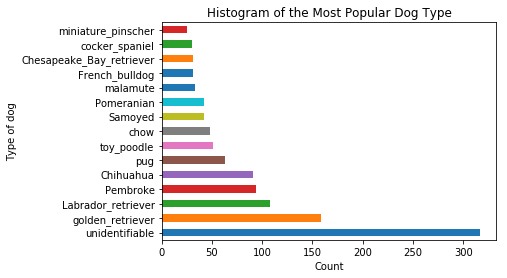

In [87]:
dog_type = twitter_final.groupby('prediction').filter(lambda x: len(x)  >= 25)

dog_type['prediction'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Popular Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

In [88]:
twitter_final[twitter_final['prediction'] == 'golden_retriever']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,confidence
14,889531135344209921,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Stuart. He's sporting his favorite fanny pack. Secretly filled with bones only. 13/10 puppared puppo #BarkWeek https://t.co/y70o6h3isq,https://twitter.com/dog_rates/status/889531135344209921/photo/1,13,10,Stuart,2017,7,24,puppo,15359,2321,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442
16,888917238123831296,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jim. He found a fren. Taught him how to sit like the good boys. 12/10 for both https://t.co/chxruIOUJN,https://twitter.com/dog_rates/status/888917238123831296/photo/1,12,10,Jim,2017,7,23,,29611,4709,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719
17,888804989199671297,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zeke. He has a new stick. Very proud of it. Would like you to throw it for him without taking it. 13/10 would do my best https://t.co/HTQ77yNQ5K,"https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1",13,10,Zeke,2017,7,22,,26080,4559,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760
39,883482846933004288,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,2017,7,8,,46860,10407,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082
41,883117836046086144,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E","https://twitter.com/dog_rates/status/883117836046086144/photo/1,https://twitter.com/dog_rates/status/883117836046086144/photo/1",13,10,NaN,2017,7,7,,37914,6949,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562
45,882268110199369728,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfy. You're witnessing his first watermelon experience. I think it was a success. 13/10 happy 4th Alfy 🇺🇸 https://t.co/fYP5RlutfA,"https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1,https://twitter.com/dog_rates/status/882268110199369728/photo/1",13,10,Alfy,2017,7,4,,45880,12118,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211
46,882045870035918850,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Koko. Her owner, inspired by Barney, recently built a cart for her to use during walks if she got tired. 13/10 rest easy Koko https://t.co/zeDpnsKX7w","https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1,https://twitter.com/dog_rates/status/882045870035918850/photo/1",13,10,Koko,2017,7,4,,29900,5203,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,golden_retriever,0.006941
53,880465832366813184,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bella. She had her first beach experience this morning. Complete success. 12/10 would perform a sandy boop https://t.co/4VsFysDmiw,"https://twitter.com/dog_rates/status/880465832366813184/photo/1,https://twitter.com/

In [89]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg')
# This is an image for tweet_id 889531135344209921

##### This is Stuart. He is a golden retriever and loves fanny packs.  He has a 13/10 rating 

## Insight two: The highest and lowest rated dog breed on WeRateDogs

I'm using the columns that were merged and cleaned from the previous multiple prediction and confidence columns.

In [90]:
dog_type_mean = twitter_final.groupby('prediction').mean()
dog_type_mean.head()


,tweet_id,rating_numerator,rating_denominator,year,month,day,favorite_count,retweet_count,img_num,confidence
prediction,,,,,,,,,,
Afghan_hound,8.171385e+17,9.666667,10.0,2016.666667,4.666667,16.000000,8127.666667,5976.0000,1.000000,0.433959
Airedale,7.184489e+17,9.833333,10.0,2015.583333,8.750000,15.916667,5280.833333,1393.7500,1.166667,0.583771
American_Staffordshire_terrier,7.597284e+17,10.312500,10.0,2016.187500,5.250000,15.000000,9380.187500,2310.8125,1.187500,0.527359
Appenzeller,7.939334e+17,11.000000,10.0,2016.500000,4.500000,18.500000,7317.500000,1458.0000,1.000000,0.503665
Australian_terrier,7.785921e+17,11.500000,10.0,2016.500000,3.500000,7.000000,11127.500000,3078.5000,2.000000,0.307584


In [91]:
dog_type_sorted = dog_type_mean['rating_numerator'].sort_values()

dog_type_sorted

prediction
Japanese_spaniel               5.000000 
Scotch_terrier                 9.000000 
Walker_hound                   9.000000 
Tibetan_terrier                9.250000 
Maltese_dog                    9.315789 
dalmatian                      9.333333 
Boston_bull                    9.416667 
Welsh_springer_spaniel         9.500000 
Dandie_Dinmont                 9.571429 
miniature_schnauzer            9.600000 
Norwich_terrier                9.600000 
redbone                        9.666667 
Afghan_hound                   9.666667 
Scottish_deerhound             9.750000 
Rhodesian_ridgeback            9.750000 
Airedale                       9.833333 
Mexican_hairless               9.857143 
Newfoundland                   9.857143 
Saint_Bernard                  9.857143 
English_setter                 9.875000 
miniature_poodle               9.875000 
groenendael                    10.000000
Ibizan_hound                   10.000000
Great_Dane                     10.000000
Irish

In [92]:
twitter_final[twitter_final['prediction'] == 'Japanese_spaniel']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,confidence
1470,677301033169788928,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak,https://twitter.com/dog_rates/status/677301033169788928/photo/1,5,10,Juckson,2015,12,17,,1362,471,https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg,1,Japanese_spaniel,0.661178


#  What is the lowest rated dog breed?

In [93]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/CWZBsjPWsAAZFFl.jpg')
# This is an image for tweet_id 677301033169788928

### This is Juckson the Japanese spaniel with the lowest rating of 5. 

#  What is the highest rated dog breed?

In [94]:
twitter_final[twitter_final['prediction'] == 'clumber']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,confidence
582,778027034220126208,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,2016,9,20,pupper,7320,1885,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718


In [95]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')
# This is an image for tweet_id 778027034220126208

## This is Sophie a Clumber with the highest rating of 27.

- On WeRateDogs the most popular dog breed is the golden retriever that was posted 158 times.  The lowest rated dog breed was the japanese spaniel at 5 and the highest rated dog breed was the clumber at 27.

# Insight three: What is the most popular dog name?

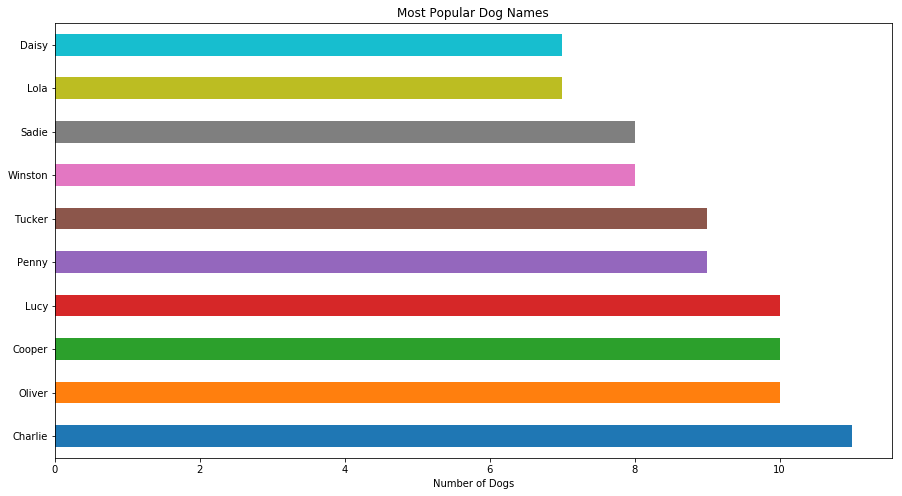

In [96]:
twitter_final.name.value_counts()[0:10].plot('barh', figsize=(15,8), title='Most Popular Dog Names').set_xlabel("Number of Dogs");

In [97]:
twitter_final.name.value_counts()

Charlie      11
Oliver       10
Cooper       10
Lucy         10
Penny        9 
Tucker       9 
Winston      8 
Sadie        8 
Lola         7 
Daisy        7 
Toby         7 
Koda         6 
Bo           6 
Stanley      6 
Bella        6 
Jax          6 
Scout        5 
Oscar        5 
Leo          5 
Bailey       5 
Dave         5 
Buddy        5 
Chester      5 
Louis        5 
Rusty        5 
Milo         5 
Scooter      4 
Alfie        4 
Finn         4 
Derek        4 
            .. 
Rinna        1 
Sierra       1 
Yoda         1 
Bradlay      1 
Rubio        1 
Mack         1 
Tupawc       1 
Oreo         1 
Grizz        1 
Snickers     1 
Scruffers    1 
Stewie       1 
Liam         1 
Karl         1 
Banjo        1 
Alfy         1 
Ester        1 
Gin          1 
Tess         1 
Tanner       1 
Lance        1 
Smiley       1 
Damon        1 
Darla        1 
Superpup     1 
Lulu         1 
Margo        1 
Aqua         1 
Norman       1 
Howie        1 
Name: name, Length: 912,

In [98]:
twitter_final[twitter_final['name'] == 'Charlie']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_stage,favorite_count,retweet_count,jpg_url,img_num,prediction,confidence
202,844580511645339650,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wants to know if you have a moment to talk about washing machine insurance policies. 11/10 would hear him out https://t.co/gAzPqT7uyk,https://twitter.com/dog_rates/status/844580511645339650/photo/1,11,10,Charlie,2017,3,22,,17871,3533,https://pbs.twimg.com/media/C7iNfq1W0AAcbsR.jpg,1,unidentifiable,0.000000
208,842846295480000512,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's wishing you a very fun and safe St. Pawtrick's Day. 13/10 festive af https://t.co/nFpNgCWWYs,https://twitter.com/dog_rates/status/842846295480000512/photo/1,13,10,Charlie,2017,3,17,,16440,4023,https://pbs.twimg.com/media/C7JkO0rX0AErh7X.jpg,1,Labrador_retriever,0.461076
256,833826103416520705,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Charlie. She asked u to change the channel to Animal Planet at least 6 times. Now taking matters into her own paws. 13/10 assertive af https://t.co/WTzhtfevKY,"https://twitter.com/dog_rates/status/833826103416520705/photo/1,https://twitter.com/dog_rates/status/833826103416520705/photo/1",13,10,Charlie,2017,2,20,,16728,3904,https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg,1,Chihuahua,0.438054
265,832369877331693569,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He fell asleep on a heating vent. Would puppreciate your assistance. 11/10 someone help Charlie https://t.co/Dhdx5HnQ4d,https://twitter.com/dog_rates/status/832369877331693569/photo/1,11,10,Charlie,2017,2,16,,18792,3652,https://pbs.twimg.com/media/C40r_GDWAAA5vNJ.jpg,1,kelpie,0.504690
301,827199976799354881,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He wins every game of chess he plays. Won't let opponent pet him until they forfeit. 13/10 you win again Charlie https://t.co/UkyQibIBzZ,"https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1,https://twitter.com/dog_rates/status/827199976799354881/photo/1",13,10,Charlie,2017,2,2,,11659,2579,https://pbs.twimg.com/media/C3rN-lcWEAA9CmR.jpg,4,Great_Dane,0.869681
621,771102124360998913,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He works for @TODAYshow. Super sneaky tongue slip here. 12/10 would pet until someone made me stop https://t.co/K5Jo7QRCvA,https://twitter.com/dog_rates/status/771102124360998913/photo/1,12,10,Charlie,2016,8,31,,6898,1663,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg,1,Labrador_retriever,0.568789
722,754011816964026368,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He pouts until he gets to go on the swing. 12/10 manipulative af https://t.co/ilwQqWFKCh,"https://twitter.com/dog_rates/status/754011816964026368/photo/1,https://twitter.com/dog_rates/status/754011816964026368/photo/1",12,10,Charlie,2016,7,15,,9726,4079,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French_bulldog,0.600985
1087,703382836347330562,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Charlie. He's a West Side Niddlewog. Mucho fluffy. 12/10 would pet so damn well https://t.co/B9dOrmnPVt,"https://twitter.com/dog_rates/status/703382836347330562/photo/1,https://twitter.com/dog_rates/status/703382836347330562/photo/1",12,10,Charlie,2016,2,27,,3837,1285,https://pbs.twimg.com/media/CcLq7ipW4AArSGZ.jpg,2,golden_retriever,0.945664
1157,697255105972801536,"<a href=""http://twitter.com/download/iphone"" rel=""n

In [99]:
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/C5JYaYoVYAAcEQw.jpg')
# This is an image for tweet_id 833826103416520705

## HI I'm Charlie! One of the most popular dog names on WeRateDogs.